# Python para Geociencias

### Víctor Rojas
#### vr.rojaspozo@gmail.com

Esto es parte de las notas de [**Python para Geociencias**](https://github.com/vrrp/Workshop2018Python)  

# 10. Matplotlib
**Matplotlib** es un paquete de Python para generar figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas. **Matplotlib** es una creación de John Hunter (1968-2012), quién, junto con sus numerosos colaboradores, han invertido una cantidad inmensurable de tiempo y esfuerzo en la producción de un software utilizado por miles de científicos de todo el mundo.
Para mayor información visitar: www.scipy.org

Para desarrollar el presente capítulo, se empleará los datos de los archivos en formatos **ASCII, shapes** y **tiff**, que se encuentra en el directorio **data**. Acontinuación se presenta el módulo que prepara la data para su visuzalización.

In [2]:
import numpy as np

def getDataCol(filename, ncol, separador, typeVal="number"):
    fillValue = 999
    file = open(filename,'r')
    dataCol = []
    
    if typeVal =="number":
        for line in file.readlines():
            l = line.replace('\n','').split(separador)
            il = l[ncol]
            try:
                dataCol.append(float(il))
            except(ValueError):
                  dataCol.append(fillValue)              
    elif typeVal=="str":
        for line in file.readlines():
            l = line.replace('\n','').split(separador)
            puente = []
            for i in l:
                if len(i)==0:
                    pass
                else: puente.append(i)
            il = puente[ncol]
            dataCol.append(il)
        dataCol = np.array(dataCol[1:], dtype=float)
    return dataCol

filename = "./data/prc.txt"
lons = getDataCol(filename, 0, separador=" ", typeVal="str")  
lats = getDataCol(filename, 1, separador=" ", typeVal="str")
data = getDataCol(filename, 2, separador=" ", typeVal="str")
print(type(data))
print(data)
print(lats)
print(lons)


<class 'numpy.ndarray'>
[41. 43. 46. 33. 43. 33. 46. 44. 35. 24. 10. 39. 44. 46. 47. 31. 39. 45.
 31. 39. 42. 15. 39. 44. 39. 38. 32. 23. 27.]
[-13.6 -16.9 -10.2 -13.6 -14.4 -12.6 -15.8 -14.8 -10.2 -13.5  -9.8 -17.8
 -12.3 -15.4 -16.1 -11.1  -8.9 -13.3 -15.3 -11.9 -15.  -11.8 -13.  -14.3
 -16.1 -13.2 -17.5 -12.2 -13.5]
[-72.6 -73.1 -72.7 -74.2 -68.5 -78.1 -67.9 -74.8 -71.1 -65.9 -69.1 -75.8
 -73.2 -68.3 -77.6 -68.9 -81.3 -81.9 -73.1 -81.4 -77.1 -74.4 -68.6 -71.3
 -73.3 -70.2 -74.3 -76.4 -73.1]


## 10.1. Gráficos en 2D


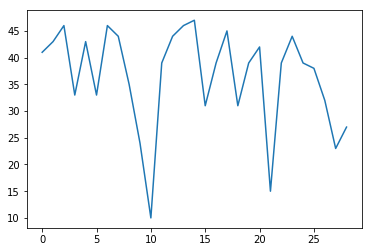

In [34]:
import matplotlib.pyplot as plt # importando el paquete matplolib como plt

plt.plot(data)
plt.show()

Acontinuación intetaremos mejorar el gráfico anterior usando los módulos y métodos que ofrece el paquete **matplotlib**.

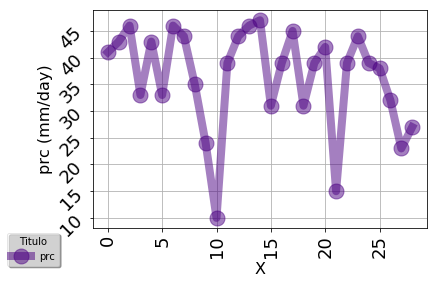

In [33]:
# Generar gráfico
colores = ["indigo", "pink", "olive", "peru", "ivory", "linen"]
plt.plot(data, 
         linewidth=8., 
         linestyle="-", 
         marker="o", 
         markersize=15, 
         color=colores[0], 
         alpha=0.5, 
         label="prc")

plt.xticks(size=18, rotation=90)
plt.yticks(size=18, rotation=45)

plt.xlabel("X", size=16)
plt.ylabel("prc (mm/day)", size=16)
# Agregar leyenda
plt.legend(loc="upper left", 
           bbox_to_anchor=(-0.27, 0), # bbox_to_anchor=(posiCol, posiFila)
		   ncol=1, shadow=True, title="Titulo", fancybox=True, 
           framealpha=0.5, frameon=True)

# Activar grilla
plt.grid(True)

# Visualiza en pantalla el gráfico
plt.show()

**Matplotlib** es capaz de asignar los valores de los ejes no sólo con variables numéricas, sino
también con cadena de caracteres.

29


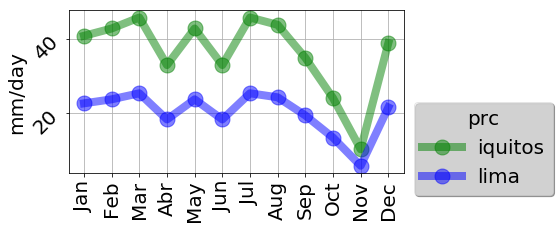

In [63]:
import matplotlib
params = {'font.size'     : 20,
          'figure.figsize':(6.0, 3.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
    
matplotlib.rcParams.update(params)

# Generar etiquetas
xlabels = ["Jan", "Feb", "Mar", "Abr","May", "Jun",
	       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
xlabels_positions = np.arange(12)

# Generar gráfico
print(len(data))
plt.plot(xlabels_positions, data[:12], 
         linewidth=8., 
         color="g", 
         alpha=0.5, 
         label="iquitos")

plt.plot(xlabels_positions, data[:12]*0.55, 
         linewidth=8., 
         color="b", 
         alpha=0.5, 
         label="lima")

# Modificar las etiquetaqs del eje X
plt.xticks(xlabels_positions, xlabels, rotation=45*2)
plt.yticks(rotation=45)
plt.ylabel("mm/day")

# Agregar leyenda
plt.legend(loc="upper left", 
           bbox_to_anchor=(1, 0.5), # bbox_to_anchor=(posiCol, posiFila)
		   ncol=1, shadow=True, title="prc", fancybox=True, 
           framealpha=0.5, frameon=True)

# Activar grilla
plt.grid(True)

# Visualiza en pantalla el gráfico
plt.show()

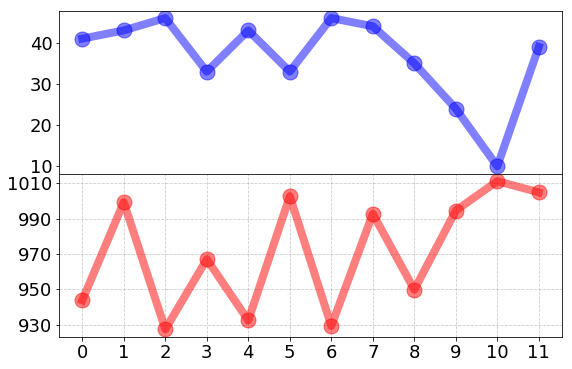

In [67]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib

params = {'font.size'     : 18,
          'figure.figsize':(9.0, 6.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}

matplotlib.rcParams.update(params)

# Generar etiquetas
xlabels = ["Jan", "Feb", "Mar", "Abr","May", "Jun",
	       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
xlabels_positions = np.arange(12)

Rn = np.random.random(12)*100-10 
pp = np.arange(11,23)+Rn+920

# Multi-paneles
fig, panel = plt.subplots(2, 1, sharex=True) # plt.subplots(nfilas, ncolumnas, sharex=True)

# Remover los espacios horizontales entre ejes
fig.subplots_adjust(hspace=0)

panel[0].plot(xlabels_positions, data[:12],
         linewidth=8., 
         color="b", 
         alpha=0.5, 
         label="prc")
#plt.yticks(size=18, rotation=0)
panel[0].set_xticks(xlabels_positions)

panel[1].plot(xlabels_positions, pp, 
         linewidth=8., 
         color="r", 
         alpha=0.5, 
         label="pp")
panel[1].set_yticks(np.arange(930,1030,20))
panel[1].grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)
plt.show()

['prc', 'pp']


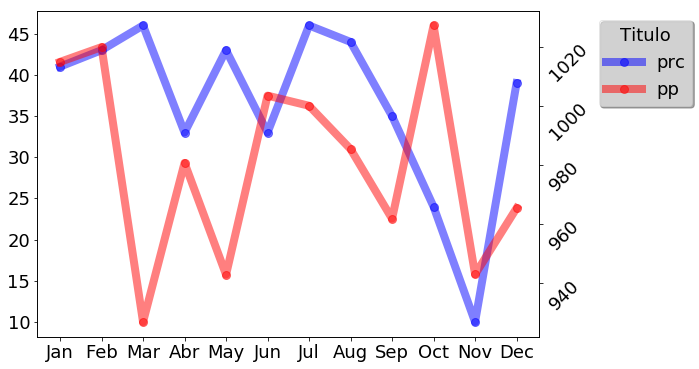

In [69]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
params = {'font.size'     : 18,
          'figure.figsize':(9.0, 6.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
    

matplotlib.rcParams.update(params)

# Generar etiquetas
xlabels = ["Jan", "Feb", "Mar", "Abr","May", "Jun",
	       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
xlabels_positions = np.arange(12)

Rn = np.random.random(12)*100-10 
pp = np.arange(11,23)+Rn+920

fig = plt.figure() 
ax = fig.add_subplot(111) 

# Agregar primer eje Y
lns1 = ax.plot(xlabels_positions, data[:12], 
               linewidth=8., 
               linestyle="-", 
               marker="o", 
               markersize=8, 
               color="b", 
               alpha=0.5, 
               label="prc")

# Agregar segundo eje Y
ax2 = ax.twinx() 
lns2 = ax2.plot(xlabels_positions, pp, 
                linewidth=8., 
                linestyle="-", 
                marker="o", 
                markersize=8, 
                color="r", 
                alpha=0.5, 
                label="pp")

# Modificar las etiquetaqs del eje X
plt.xticks(xlabels_positions, xlabels, rotation=45)
plt.yticks(rotation=45)

# Agregar leyenda 
lns = lns1+lns2
labs = [l.get_label() for l in lns] 
print(labs)
ax.legend(lns, labs,loc="upper left", 
           bbox_to_anchor=(1.1, 1), # bbox_to_anchor=(posiCol, posiFila)
		   ncol=1, shadow=True, title="Titulo", fancybox=True, 
           framealpha=0.5, frameon=True)
#plt.grid(True)
plt.show()

['prc', 'pp']
Tienes suerte, los graficos se crearon sin problemas...


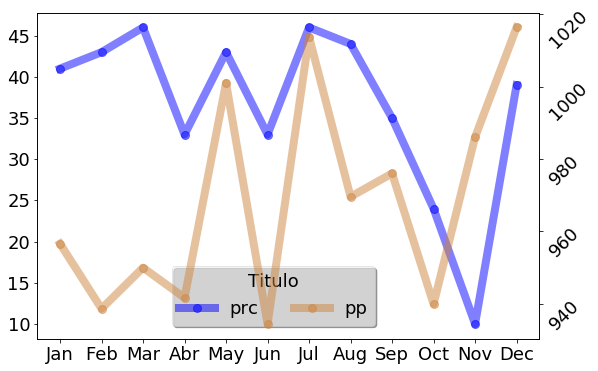

In [89]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib

def plot2ejesY(data2plot):
    params = {'font.size'     : 18,
              'figure.figsize':(9.0, 6.0), # 'figure.figsize':(ncols, nfilas)
              'lines.linewidth': 2.,
              'lines.markersize': 15,
              'lines.linestyle' : "-",
              'lines.marker' : 'o'}
    matplotlib.rcParams.update(params)
    
    # Generar etiquetas
    xlabels = ["Jan", "Feb", "Mar", "Abr","May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    xlabels_positions = np.arange(12)
    
       
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    
    # Agregar primer eje Y
    lns1 = ax.plot(xlabels_positions, data2plot["data1"], 
                   linewidth=8., 
                   linestyle="-", 
                   marker="o", 
                   markersize=8, 
                   color=data2plot["linecolor"][0], 
                   alpha=0.5, 
                   label=data2plot["leyenda"][0])
    # Agregar segundo eje Y
    ax2 = ax.twinx() 
    lns2 = ax2.plot(xlabels_positions, data2plot["data2"], 
                    linewidth=8., 
                    linestyle="-", 
                    marker="o", 
                    markersize=8, 
                    color=data2plot["linecolor"][1], 
                    alpha=0.5, 
                    label=data2plot["leyenda"][1])
    # Modificar las etiquetaqs del eje X
    plt.xticks(xlabels_positions, xlabels, rotation=45)
    plt.yticks(rotation=45)
    
    # Agregar leyenda 
    lns = lns1+lns2
    labs = [l.get_label() for l in lns] 
    print(labs)
    ax.legend(lns, labs,loc="upper left", 
              bbox_to_anchor=(0.25, 0.25), # bbox_to_anchor=(posiCol, posiFila)
              ncol=2, shadow=True, title="Titulo", fancybox=True, 
              framealpha=0.5, frameon=True)
    
    # Guardar grafico
    out_name = data2plot["guardar_figura"]
    plt.savefig(out_name+".png", format='png', dpi=200, transparent=True, pad_inches=0.05)
    plt.savefig(out_name+".eps", format='eps')
    plt.savefig(out_name+".pdf", format='pdf')
    plt.savefig(out_name+".ps", format='ps')
    plt.savefig(out_name+".svg", format='svg')
    print("Tienes suerte, los graficos se crearon sin problemas...")
    plt.show()
#--------------------------------------------------------------------------------------
color = ["red", "blue","gree","indigo", "pink", "olive", "peru", "ivory", "linen"]


Rn = np.random.random(12)*100-10 
pp = np.arange(11,23)+Rn+920

leyenda = ["prc", "pp"]
color1,color2 =(1,6)
out_name = "./graficos/plot2ejesY"
data2plot = {"data1":data[:12],
             "data2":pp,
             "leyenda": leyenda,
             "linecolor": [color[color1], color[color2]],
             "guardar_figura": out_name
              }


plot2ejesY(data2plot)

## 10.2. Radares

[0.0, 0.5235987755982988, 1.0471975511965976, 1.5707963267948966, 2.0943951023931953, 2.6179938779914944, 3.141592653589793, 3.6651914291880923, 4.1887902047863905, 4.71238898038469, 5.235987755982989, 5.759586531581287]


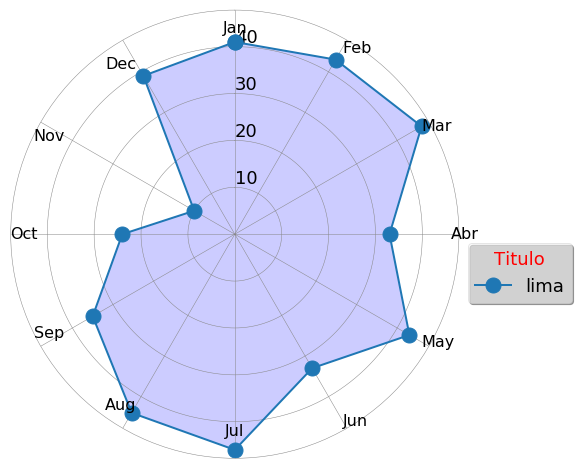

In [100]:
from math import pi
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib
params = {'font.size'     : 18,
          'figure.figsize':(9.0, 6.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
matplotlib.rcParams.update(params)

# Generar etiquetas
xlabels = ["Jan", "Feb", "Mar", "Abr","May", "Jun",
	       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
xlabels_positions = np.arange(12)

N = len(xlabels)
x_as = [n / float(N) * 2 * pi for n in range(N)]

data1 = list(data[:12])
print(x_as)
data1 += data1[:1]
x_as += x_as[:1]

# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")

# Create polar plot
#ax = plt.subplot(111, polar=True)

fig = plt.figure(figsize=(7.5,7))
#ax = plt.axes((0.12, 0.1, 0.83, 0.88))
ax = fig.add_axes([0.1, 0.05, 0.83, 0.9], polar=True)

# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
# Set position of y-labels
ax.set_rlabel_position(0)
# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])

# Set yticks
#plt.yticks([0.5, 1, 1.5, 2, 2.5], ["0.5", "1", "1.5", "2", "2.5"])
#plt.yticks([10, 15, 20, 25, 30,35,40], ["10", "15", "20", "25", "30", "35", "40"])

# Plot data

ax.plot(x_as, data1, label="lima")
#ax.plot(x_as, float(data1)*0.5, label="prc")

# Fill area
ax.fill(x_as, data1, facecolor='b', alpha=0.2)


# Set axes limits
#plt.ylim(0, 40)

labels = ('prc')
# Agregar leyenda
ax.legend(loc="upper left", 
           bbox_to_anchor=(1, 0.5), # bbox_to_anchor=(posiCol, posiFila)
		   ncol=1, shadow=True, title="Titulo", fancybox=True, 
           framealpha=0.5, frameon=True)

ax.get_legend().get_title().set_color("red")

# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi
    
    if angle_rad == 0:
        ha, distance_ax = "center", 4
    elif pi< angle_rad < 2*pi/3:
        ha, distance_ax = "left", 6
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 6
    elif angle_rad == pi:
        ha, distance_ax = "center", 2
    else:
        ha, distance_ax = "right", 2
    ax.text(angle_rad, 40 + distance_ax, xlabels[i], size=16, horizontalalignment=ha, 
            verticalalignment="center")


# Show polar plot
plt.show()


## 10.2. Rosa de viento

El paquete **windrose** permite crear rosas de viento a partir de los datos de dirección e intensidad del viento. El módulo **windrose** es un paquete que es necesario instalarlo, ya que no viene por defecto en la instalación de Python o Anaconda. Para instalarlo ejecutar la siguiente línea de comando, para lo cual es necesario estar conectado a la red internet.

#### $ pip install windrose


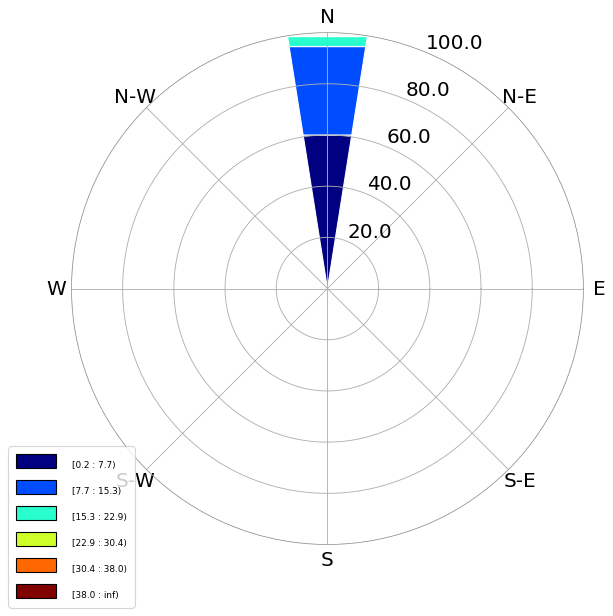

In [103]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
   

def get_dirvel4wind(u,v):
    import math
    theta = []; vel = []
    for iu, iv in zip(u,v):
        itheta = math.atan(iv/iu)
        theta.append(itheta/180*math.pi)
        
        ivel = math.sqrt(iu*iu +iv*iv)
        vel.append(ivel)
    return theta, vel

filename = "./data/uvp.dat"
u = getDataCol(filename, 0, separador=" ", typeVal="str") 
v = getDataCol(filename, 1, separador=" ", typeVal="str") 
theta, vel = get_dirvel4wind(u,v)   

fig = plt.figure(figsize=(10, 9), dpi=100)

ax = WindroseAxes.from_ax()
ax.bar(theta, vel, normed=True, opening=0.8, edgecolor='white')
ax.set_legend(bbox_to_anchor=(-0.12, -0.12))
plt.savefig("./graficos/windrose_new.png")
plt.show()

## 10.3. Dispersión

29 29 29


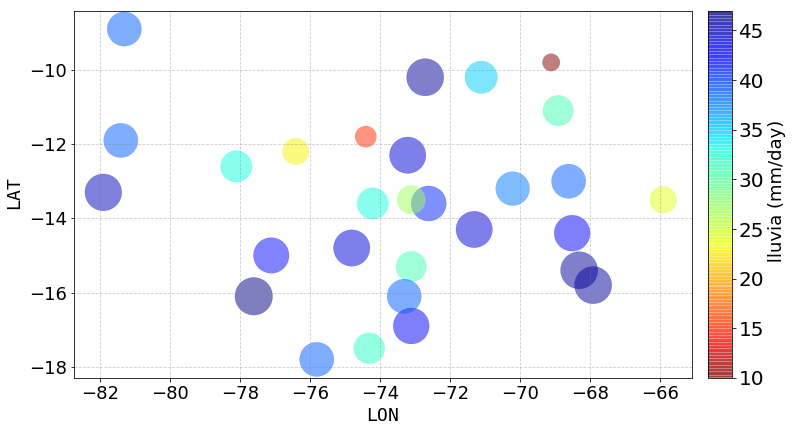

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'font.size'     : 18,
          'figure.figsize':(11.0, 6.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
matplotlib.rcParams.update(params)

print(len(lons), len(lats), len(data))


figure = plt.figure()
ax =figure.add_axes([0.1, 0.1, 0.78, 0.85]) #figure.add_axes([x0, y0, x1, y1])
#ax =figure.add_axes([0.1,0.1,0.5,0.5])

cmap = plt.cm.get_cmap('jet_r')
ax.set_xlabel(r'$\mathtt{LON}$')
ax.set_ylabel(r'$\mathtt{LAT}$')
ax.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)

# Scatter
sc=plt.scatter(lons, lats, c=data, s=data*30, 
               alpha=0.5, 
               linewidths=0.3,
               marker='o', 
               vmin=data.min(), vmax=data.max(), 
               cmap=cmap)

# BARRA DE COLOR
name_colobar = " lluvia (mm/day)"
ax_cbar = figure.add_axes([0.9, 0.1, 0.03, 0.85]) # figure.add_axes([x0, y0, x1, y1])		
cbar = plt.colorbar(sc,cax=ax_cbar, orientation='vertical')
cbar.set_label(name_colobar)
cbar.ax.tick_params(labelsize=20)

plt.savefig("./graficos/scatter.png")
plt.show()

In [15]:
import numpy as np

def getDataCol(filename, ncol, separador, typeVal="number"):
    fillValue = 999
    file = open(filename,'r')
    dataCol = []
    
    if typeVal =="number":
        for line in file.readlines():
            l = line.replace('\n','').split(separador)
            il = l[ncol]
            try:
                dataCol.append(float(il))
            except(ValueError):
                  dataCol.append(fillValue)              
    elif typeVal=="str":
        for line in file.readlines():
            l = line.replace('\n','').split(separador)
            puente = []
            for i in l:
                if len(i)==0:
                    pass
                else: puente.append(i)
            il = puente[ncol]
            dataCol.append(il)
        dataCol = np.array(dataCol[1:], dtype=float)
    return dataCol

nlons=73; nlats=73
dellat = 2.5; dellon = 5.
filename = "./data/uvp.dat"
u = getDataCol(filename, 0, separador=" ", typeVal="str")  
p= getDataCol(filename, 2, separador=" ", typeVal="str")  

lats = -90.+dellat*np.arange(nlats)
lons = -180.+dellon*np.arange(nlons)

uu = u.reshape(nlats,nlons)
pp = p.reshape(nlats,nlons)


## 10.4. Contornos y sombreados

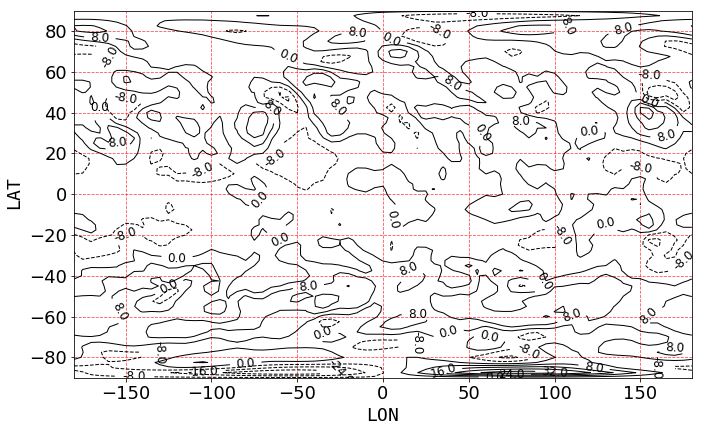

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

params = {'font.size'     : 18,
          'figure.figsize':(11.0, 6.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
matplotlib.rcParams.update(params)


fig = plt.figure()
ax =fig.add_axes([0.1,0.1,0.78,0.85])

cmap = plt.cm.get_cmap('jet_r')
ax.set_xlabel(r'$\mathtt{LON} $')
ax.set_ylabel(r'$\mathtt{LAT}$')
ax.grid(b=True, which='major', color='red', linestyle='--', alpha=0.7)

x, y = np.meshgrid(lons, lats)


cs = plt.contour(x, y, uu,10,
                 linewidths=1,
                 colors="k",
                 )
plt.clabel(cs, fontsize=12, inline=1, fmt='%1.1f')
plt.show()



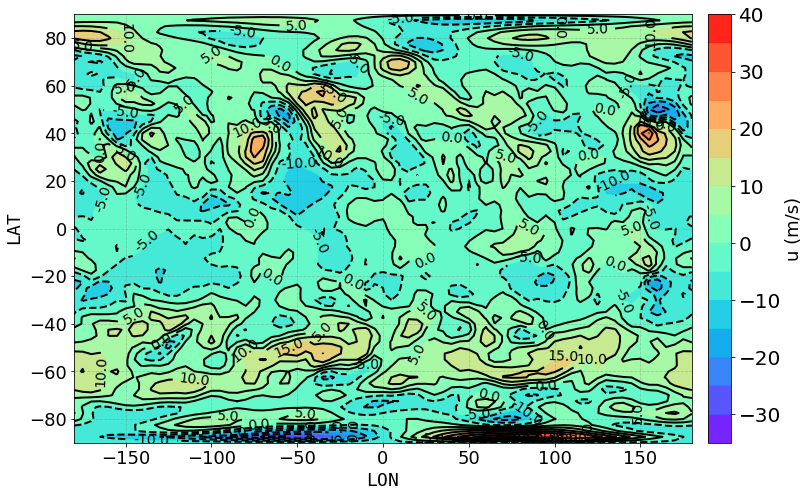

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'font.size'     : 18,
          'figure.figsize':(11.0, 7.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
matplotlib.rcParams.update(params)

# Crear base para graficar
fig = plt.figure(facecolor='w')
ax =fig.add_axes([0.1,0.1,0.78,0.85])

cmap = plt.cm.get_cmap('rainbow')
ax.set_xlabel(r'$\mathtt{LON} $')
ax.set_ylabel(r'$\mathtt{LAT}$')
ax.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)

x, y = np.meshgrid(lons, lats)

# contourf
con = plt.contourf(x, y, uu,15, 
                   alpha=.95, 
                   cmap=cmap)

# contour
cs = plt.contour(x, y, uu,15,
                 linewidths=2,
                 colors="k",
                 )
plt.clabel(cs, fontsize=14, inline=1, fmt='%1.1f')

# barra de colores
name_colobar = "u (m/s)"
ax_cbar = fig.add_axes([0.9, 0.1, 0.03, 0.85])			
cbar = plt.colorbar(con,cax=ax_cbar, orientation='vertical')
cbar.set_label(name_colobar)
cbar.ax.tick_params(labelsize=20)
plt.show()


## 10.5. Mallas y contornos
En este paso se hará uso del paquete **shapefile**. El cual se instala ejecutando la siguiente línea de comando:

#### conda install -c conda-forge pyshp

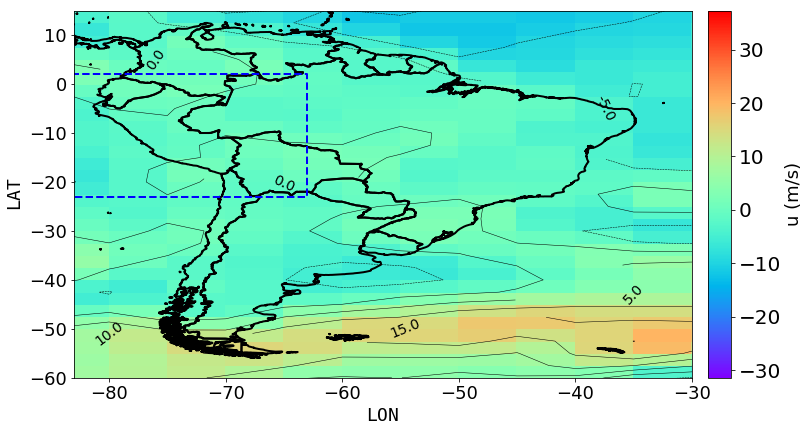

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'font.size'     : 18,
          'figure.figsize':(11.0, 6.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
matplotlib.rcParams.update(params)

# Crear base para graficar
fig = plt.figure(facecolor='w')
ax =fig.add_axes([0.1,0.1,0.78,0.85])

cmap = plt.cm.get_cmap('rainbow')
ax.set_xlabel(r'$\mathtt{LON} $')
ax.set_ylabel(r'$\mathtt{LAT}$')
ax.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)

x, y = np.meshgrid(lons, lats)

# pcolormesh
im = ax.pcolormesh(x, y, uu, cmap=cmap)

# contour
cs = plt.contour(x, y, uu,15,
                 linewidths=0.5,
                 colors="k")
plt.clabel(cs, fontsize=14, inline=1, fmt='%1.1f')

# colocar shapefile
#------------------------------------------------------------------------------------------
import shapefile as shp

sf = shp.Reader('./data/shp/Countries_Shape/ne_10m_admin_0_countries.shp')

for shape in sf.shapeRecords():
    
    # indexando cada componente del mapa 
    l = shape.shape.parts
    
    len_l = len(l)  # cantidad de paises i.e. islas y continentes
    xsh = [i[0] for i in shape.shape.points[:]] # lista de latitudes
    ysh = [i[1] for i in shape.shape.points[:]] # lista de longitudes
    l.append(len(xsh)) # asegurar el cierre del último componente
    for k in range(len_l):
        # graficar cada componente del mapa
        # l[k] a l[k + 1] es el conjunto puntos que forman cada componente
        plt.plot(xsh[l[k]:l[k + 1]],ysh[l[k]:l[k + 1]], 'k-')
#------------------------------------------------------------------------------------------

# colocar polígono
latlon = [2,-86,-23, -63]
xpolig = [latlon[1], latlon[1], latlon[3], latlon[3], latlon[1]]
ypolig = [latlon[0], latlon[2], latlon[2], latlon[0], latlon[0]]
plt.plot(xpolig, ypolig, "b--")

ax.set_xlim([-83,-30])
ax.set_ylim([-60,15])
# barra de colores
name_colobar = "u (m/s)"
ax_cbar = fig.add_axes([0.9, 0.1, 0.03, 0.85])
cbar = plt.colorbar(im, cax=ax_cbar, orientation='vertical')
cbar.set_label(name_colobar)
cbar.ax.tick_params(labelsize=20)
plt.show()


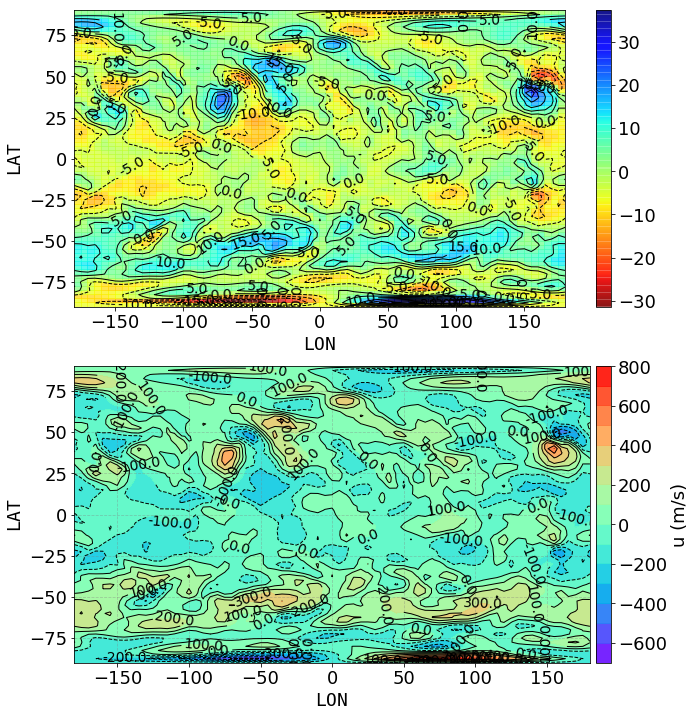

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
params = {'font.size'     : 18,
          'figure.figsize':(11.0, 12.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
matplotlib.rcParams.update(params)

x, y = np.meshgrid(lons, lats)

# Crear base para graficar
fig, (ax0, ax1) = plt.subplots(nrows=2)

# panel superior
cmap = plt.cm.get_cmap('jet_r')
ax0.set_xlabel(r'$\mathtt{LON} $')
ax0.set_ylabel(r'$\mathtt{LAT}$')
ax0.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)

# pcolormesh
im = ax0.pcolormesh(x, y, uu, cmap=cmap, alpha=0.7)

# contour
cs = ax0.contour(x, y, uu,15,
                 linewidths=1,
                 colors="k",
                 )
plt.clabel(cs, fontsize=14, inline=1, fmt='%1.1f')

# color bar
name_colorbar = "u (m/s)"
fig.colorbar(im, ax=ax0)

# panel inferior
cmap = plt.cm.get_cmap('jet_r')
ax1.set_xlabel(r'$\mathtt{LON} $')
ax1.set_ylabel(r'$\mathtt{LAT}$')
ax1.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)

# contourf
con = ax1.contourf(x, y, uu*20,15, 
                   alpha=.95, 
                   cmap=plt.get_cmap("rainbow"))

# contour
cs = ax1.contour(x, y, uu*20,15,
                 linewidths=1,
                 colors="k",
                 )
plt.clabel(cs, fontsize=14, inline=1, fmt='%1.1f')

# barra de colores
name_colorbar = "u (m/s)"
fig.colorbar(con, ax=ax1,  
             use_gridspec=True, 
             label="u (m/s)",
             orientation = "vertical",
             pad = 0.01,
             )

plt.show()

## 10.6. Exportar gráficos
** Matplotlib** permite guardar gráficos de manera permante en el disco duro en los siguientes formatos:
* png, pdf, ps, eps y svg.


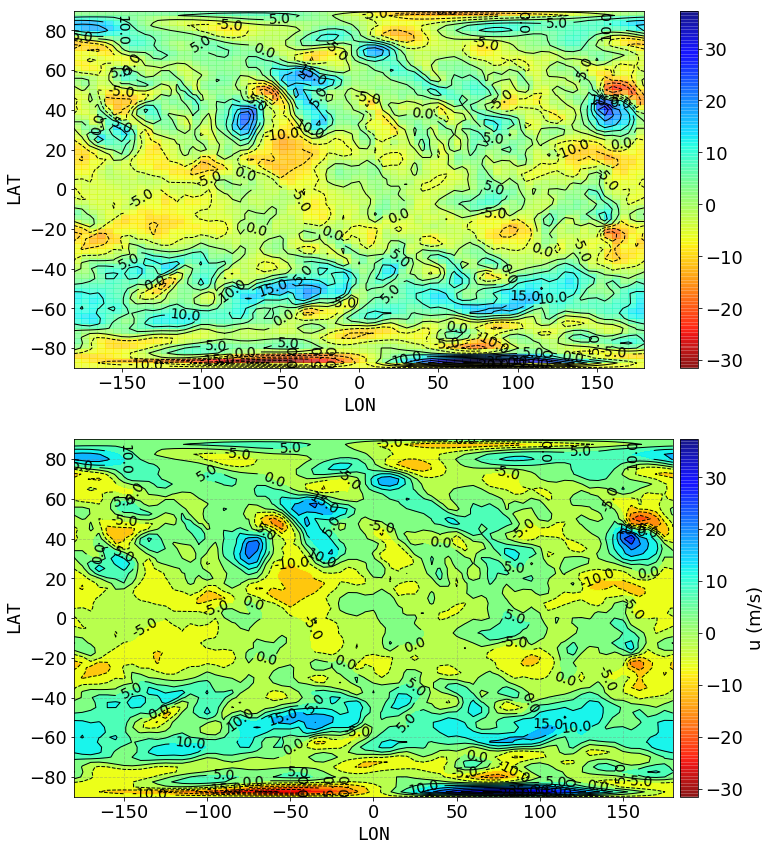

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

params = {'font.size'     : 18,
          'figure.figsize':(11.0, 12.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}

matplotlib.rcParams.update(params)

x, y = np.meshgrid(lons, lats)

# crear base para graficar
fig, (ax0, ax1) = plt.subplots(nrows=2)

# panel superior
cmap = plt.cm.get_cmap('jet_r')
ax0.set_xlabel(r'$\mathtt{LON} $')
ax0.set_ylabel(r'$\mathtt{LAT}$')
ax0.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)

# pcolormesh
im = ax0.pcolormesh(x, y, uu, alpha=0.7, cmap=cmap)

# contour
cs = ax0.contour(x, y, uu,15,
                 linewidths=1,
                 colors="k")
plt.clabel(cs, fontsize=14, inline=1, fmt='%1.1f')

# color bar
name_colorbar = "u (m/s)"
fig.colorbar(im, ax=ax0)

# panel inferior
cmap = plt.cm.get_cmap('jet_r')
ax1.set_xlabel(r'$\mathtt{LON} $')
ax1.set_ylabel(r'$\mathtt{LAT}$')
ax1.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)

# contourf
con = ax1.contourf(x, y, uu,15, 
                   alpha=.95, 
                   cmap=plt.get_cmap(cmap))

# contour
cs = ax1.contour(x, y, uu,15,
                 linewidths=1,
                 colors="k",
                 )
plt.clabel(cs, fontsize=14, inline=1, fmt='%1.1f')

# barra de colores
name_colorbar = "u (m/s)"
fig.colorbar(im, ax=ax1,  
             use_gridspec=True, 
             label="u (m/s)",
             orientation = "vertical",
             pad = 0.01,
             )

# ajustar margenes
left  = 0.1  #0.125  # the left side of the subplots of the figure
right = 1.0 #0.9    # the right side of the subplots of the figure
bottom = 0.07 #0.1   # the bottom of the subplots of the figure
top = 0.98    #0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots,
               # expressed as a fraction of the average axis width
hspace = 0.2   # the amount of height reserved for white space between subplots,
               # expressed as a fraction of the average axis height

fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top,
                wspace=wspace, hspace=hspace)

# Guardar grafico
out_name = "./graficos/uwind"
plt.savefig(out_name+".png", format='png', dpi=200, transparent=True, pad_inches=0.05)
plt.savefig(out_name+".eps", format='eps')
plt.savefig(out_name+".pdf", format='pdf')
plt.savefig(out_name+".ps", format='ps')
plt.savefig(out_name+".svg", format='svg')


## 10.7. Introducción al procesamiento digital de imágenes

Para procesar datos en formato **tiff** es necesario instalar el paquete **tifffile**. Para lo cual se debe ejecutar la siguiente instrucción en un terminal:

#### pip install tifffile=0.11.1

0 60791
0 63598


/home/vrojas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


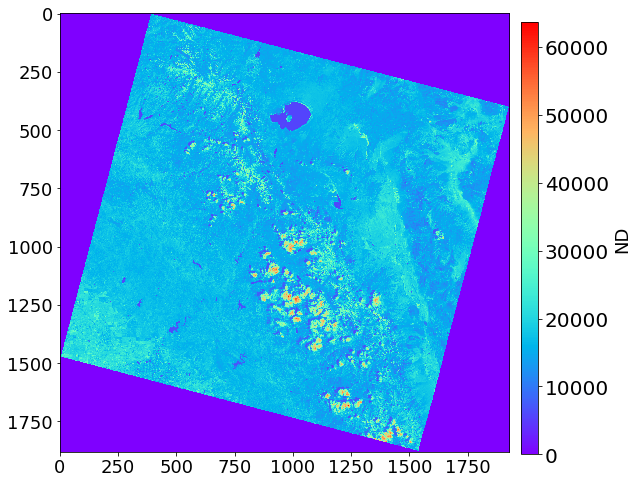

In [43]:
import numpy as np
import matplotlib.pyplot as plt


def get_ndvi(red, nir):
    """calcular NDVI.
    Datos del satélite de órbita polar Landsat 8
    Donde: 
    red : banda 4 
    nir : banda 5
    """
    red = red.astype(np.float64)
    nir = nir.astype(np.float64)
    ndvi = (nir - red) / (nir + red)
    return ndvi

def get_TiffData(banda):
    import tifffile as tiff
    fopen = tiff.imread(banda)
    nrows, ncols = fopen.shape
    #tiff.imshow(img)
    data = np.array(fopen)
    print(data.min(), data.max())
    return data

def myplot(data, name_colorbar):
    import matplotlib
    params = {'font.size'     : 18,
          'figure.figsize':(8.0, 8.0), # 'figure.figsize':(ncols, nfilas)
          'lines.linewidth': 2.,
          'lines.markersize': 15,
          'lines.linestyle' : "-",
          'lines.marker' : 'o'}
    matplotlib.rcParams.update(params)
    # Crear base para graficar
    fig = plt.figure(facecolor='w')
    ax =fig.add_axes([0.1,0.1,0.78,0.85])
    im = plt.imshow(data)
    im.set_cmap('rainbow')
    
    # barra de colores
    ax_cbar = fig.add_axes([0.9, 0.14, 0.03, 0.75])			
    cbar = plt.colorbar(im, cax=ax_cbar, orientation='vertical')
    cbar.set_label(name_colorbar)
    cbar.ax.tick_params(labelsize=20)
    plt.show()
    

g13b4 = "./data/g131702180645G13I04.tif"
b4 = './data/LC08_L1TP_042034_20130605_20170310_01_T1_B4_120x120.tiff'
b5 = './data/LC08_L1TP_042034_20130605_20170310_01_T1_B5_120x120.tiff'


bb4 = get_TiffData(b4)
bb5 = get_TiffData(b5)
ndvi = get_ndvi(bb4, bb5)

#myplot(bb4)
myplot(bb5, "ND")

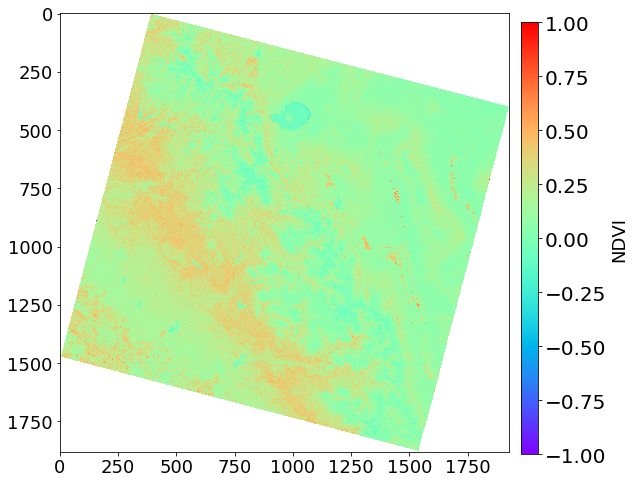

In [44]:
myplot(ndvi, "NDVI")

/home/vrojas/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/vrojas/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


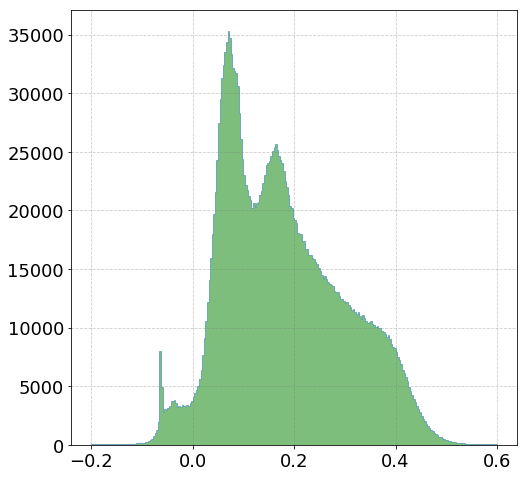

In [49]:
plt.hist(ndvi.ravel(), 
         bins=256, 
         histtype="step",  
         range=(-0.2, 0.6), 
         fc='g',
         alpha=0.51, 
         fill="True")

plt.grid(b=True, which='major', color='grey', linestyle='--', alpha=0.4)
plt.show()